## Imports

In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import pandas as pd
import numpy as np

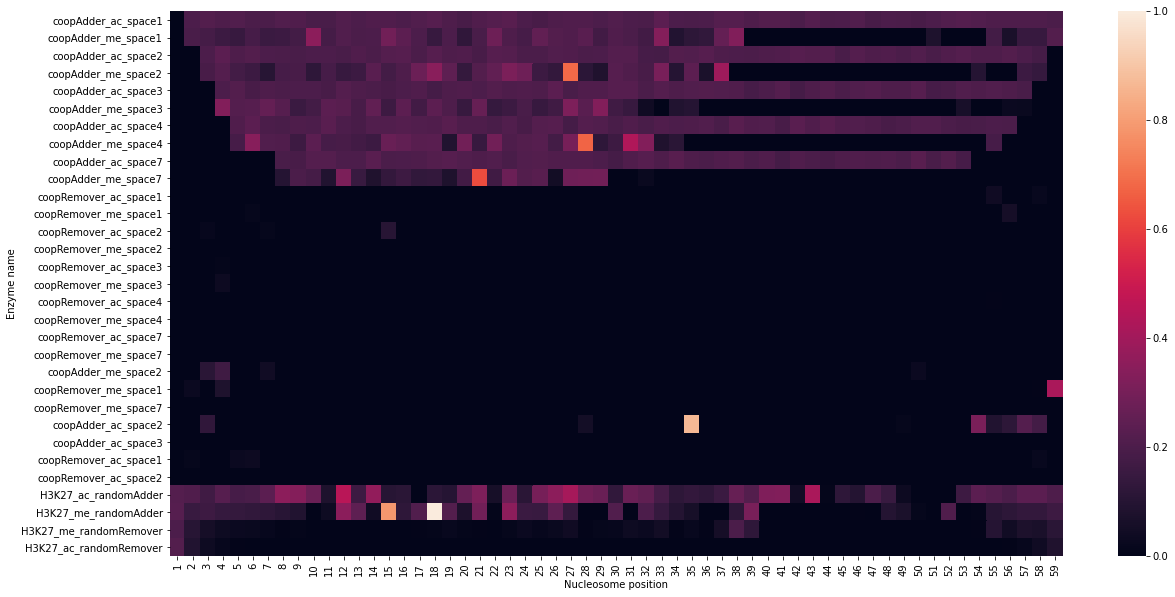

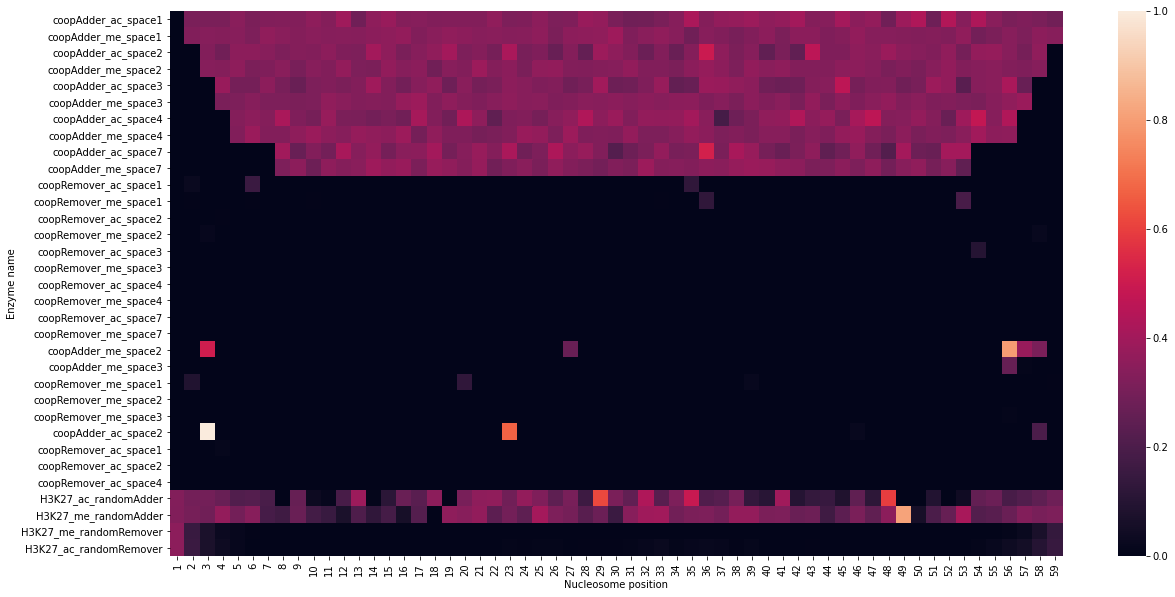

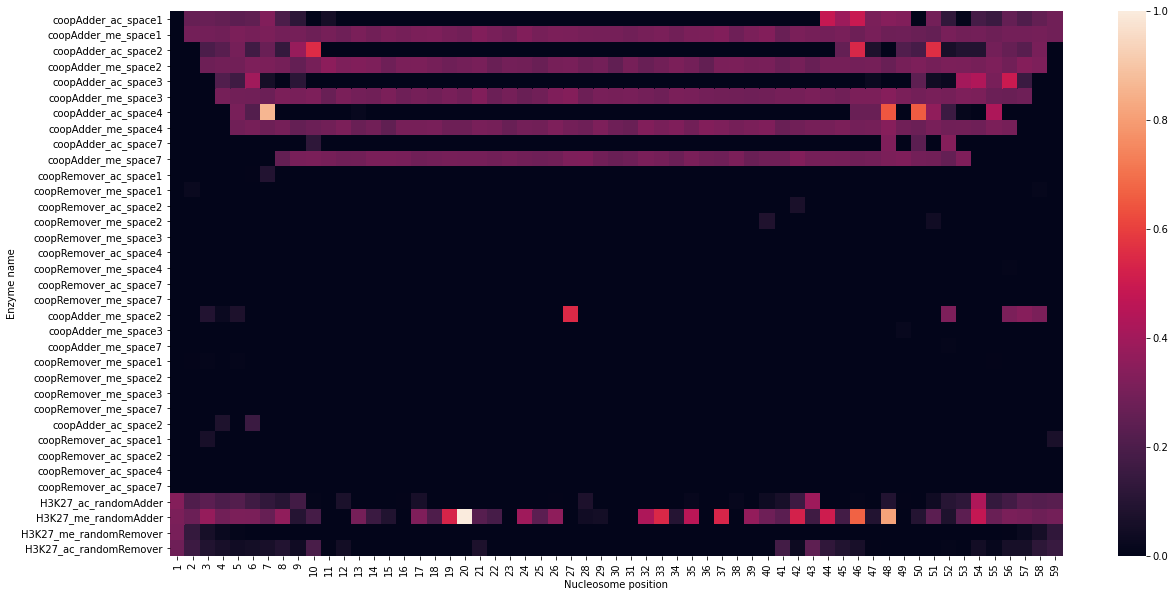

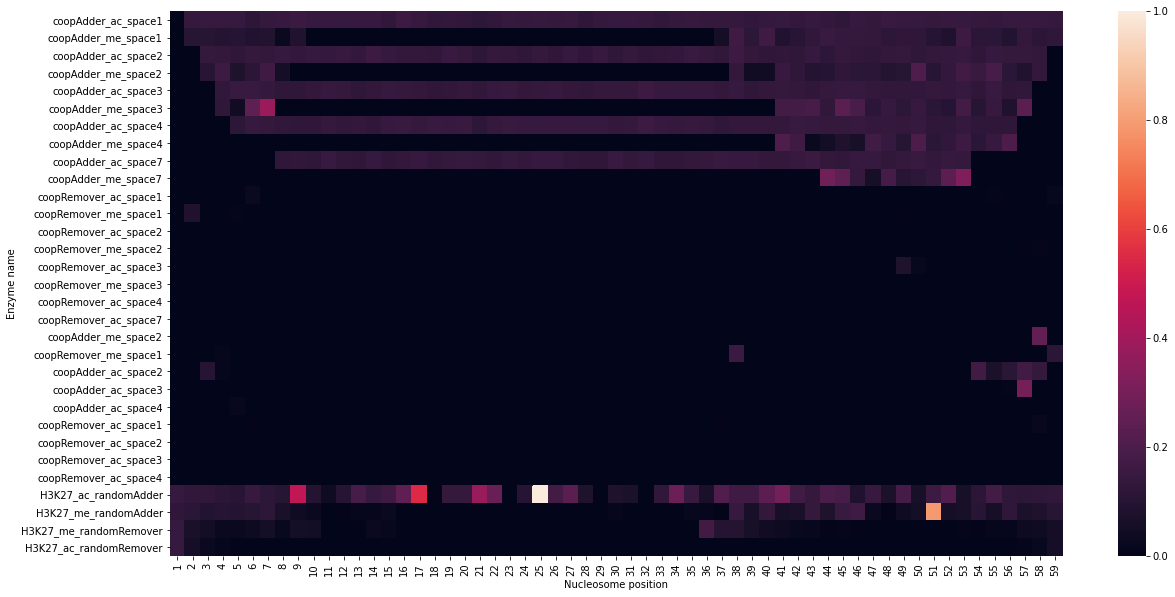

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os


dfs={}
path="../Calculations/sim/cooperative_101520/bistable_higherDissoc/analysis/"

file="../Calculations/sim/cooperative_101520/bistable_higherDissoc/results/channels.txt"
# Generate enzyme name dict from channels.txt in order to translate the reaction channels later
enzyme_name_dict = {}
with open(file) as f:
    for line in f:
        key, value = line.split(": ")
        enzyme_name_dict[key] = value.strip("\n")


for x in next(os.walk(path))[1]:


    # reading in files that hold, one by one, the type and duration of enzymes that were associated to this specific nucl
    df = pd.read_csv(path + "{}/bindingNumbers/bindingNumbersOn1.txt".format(x), sep=" ")
    for i in range(2,60):
        data_file = path + "{}/bindingNumbers/bindingNumbersOn{}.txt".format(x, i)
        new_df = pd.read_csv(data_file, sep=" ")
        df=pd.concat([df, new_df], axis=1)

    df=df.fillna(0)
    df=df.divide(df.values.max())
    dfs[x] = df


    fig, ax = plt.subplots(
        figsize=(20,8.6),
        gridspec_kw=dict(top=0.96, bottom=0.08))


    # plot heatmap for single run
    ax = sns.heatmap(dfs[x], cmap='rocket', vmin=0, vmax=df.values.max())

    # turn the axis label
    new_yticklabels = []
    for item in ax.get_yticklabels():
        new_yticklabels.append(enzyme_name_dict[item.get_text()])
        item.set_rotation(0)
    ax.set_yticklabels(new_yticklabels)

    for item in ax.get_xticklabels():
        item.set_rotation(90)

    ax.set(xlabel="Nucleosome position", ylabel="Enzyme name")
    # save figure
    # plt.savefig('./analysis/{}/{}_bindingNumbers.pdf'.format(x, x), dpi=200)
    plt.show()

# # Getting number of runs that were done
# n_runs = len([f.path for f in os.scandir("../Calculations/sim/cooperative_101520/bistable_higherDissoc/analysis") if f.is_dir()])

# # summing up and averaging all data frames of all the runs
# sum_up = lambda s1, s2: s1+s2
# df = list(dfs.values())[0]
# for frame in list(dfs.values())[1:]:

#     df = df.combine(frame, sum_up)
# df = df/n_runs

# # plot heatmap for whole run
# fig, ax = plt.subplots(
#             figsize=(20,8.6),
#             gridspec_kw=dict(top=0.96, bottom=0.08))


# # plot heatmap for single run
# ax = sns.heatmap(df, cmap='rocket', vmin=0, vmax=df.values.max())

# # translate reaction_channel into enzyme name
# new_yticklabels = []
# for item in ax.get_yticklabels():
#     new_yticklabels.append(enzyme_name_dict[item.get_text()])
#     item.set_rotation(0)
# ax.set_yticklabels(new_yticklabels)

# # turn the axis label
# for item in ax.get_xticklabels():
#     item.set_rotation(90)

# ax.set(xlabel="Nucleosome position", ylabel="Enzyme name")
# # save figure
# # plt.savefig('./analysis/bindingNumbers_{}runs.pdf'.format(n_runs), dpi=200)

## Reading in data

In [2]:
# file1 = "../Calculations/sim/cooperative_101520/bistable_higherDissoc/results/0/bindingTimesOn15.txt"
# file2 = "../Calculations/sim/cooperative_101520/bistable_higherDissoc/results/0/bindingTimesOn16.txt"
# file3 = "../Calculations/sim/cooperative_101520/bistable_higherDissoc/results/0/bindingTimesOn17.txt"
path= {}
path[0]="../Calculations/sim/cooperative_101520/bistable_higherDissoc/results/0/"
path[1]="../Calculations/sim/cooperative_101520/bistable_higherDissoc/results/1/"
path[2]="../Calculations/sim/cooperative_101520/bistable_higherDissoc/results/2/"
path[3]="../Calculations/sim/cooperative_101520/bistable_higherDissoc/results/3/"

dfs={}

for key, p in path.items():
    for i in range(1,60):
        data_file = p + "bindingTimesOn{}.txt".format(i)
        if i == 1:
            df = pd.read_csv(data_file, sep=" ")
        else:
            new_df = pd.read_csv(data_file, sep=" ")
        df=pd.concat([df, new_df], axis=1)
        df=df.fillna(0)
        dfs[key] = df

print(dfs[0])
sum_up = lambda s1, s2: s1+s2
df = dfs[0]
for frame in dfs.values()[1:]:
    df = df.combine(frame, sum_up)
df/4
    
    # dfs[x for x in path.keys() if path[x] == p] = df
# # read first line
# with open(filename) as myfile:
#     headRow = next(myfile)

# # read column names    
# # columns = [x.strip() for x in headRow.split(',')]
# columns = headRow 

# process by pandas
# df1 = pd.read_csv(file1, sep=" ")
# df2 = pd.read_csv(file2, sep=" ")
# df3 = pd.read_csv(file3, sep=" ")

# print(df1)
# print(df2)
# print(df3)

NameError: name 'new_df' is not defined

In [5]:
pd.read_csv(path[0] + "bindingTimesOn5.txt", sep=" ", index_col=1)

5
0.000105   0
0.000107   2
0.000094   4
0.000095   6
0.000092   8
0.000106  10
0.000082  12
0.000081  14
0.000070  20
0.000120  22
0.000065  24
0.000320  26
0.000103  28
0.000105  32
0.000058  34
0.000120  48
0.000015  66
0.000000  68
0.000077  76
0.000080  78
0.000092  80
0.000098  82

In [3]:
df=pd.concat(dfs, axis=1)
df=df.fillna(0)
df

1         2         3         4         5         6         7  \
0   0.000000  0.000095  0.000075  0.000101  0.000116  0.000105  0.000074   
2   0.000000  0.000107  0.000098  0.000098  0.000098  0.000104  0.000108   
4   0.000000  0.000000  0.000108  0.000086  0.000083  0.000048  0.000080   
6   0.000000  0.000000  0.000101  0.000097  0.000100  0.000101  0.000100   
8   0.000000  0.000000  0.000000  0.000093  0.000063  0.000062  0.000010   
10  0.000000  0.000000  0.000000  0.000103  0.000107  0.000106  0.000098   
12  0.000000  0.000000  0.000000  0.000000  0.000150  0.000240  0.000020   
14  0.000000  0.000000  0.000000  0.000000  0.000088  0.000103  0.000103   
16  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
18  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
20  0.000000  0.000070  0.000030  0.000000  0.000090  0.000010  0.000155   
22  0.000000  0.000090  0.000106  0.000092  0.000068  0.000270  0.000105   
24  0.000000  0.000000  0.000010  0.000090  0.000000  0.000143  0.000000   
26  0.000000  0.000000  0.000107  0.000107  0.000070  0.000170  0.000000   
28  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
30  0.000000  0.000000  0.000000  0.000109  0.000106  0.000000  0.000000   
32  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
34  0.000000  0.000000  0.000000  0.000000  0.000132  0.000119  0.000030   
36  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
38  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
40  0.000000  0.000000  0.000074  0.000195  0.000060  0.000000  0.000000   
42  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
46  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
48  0.000000  0.000130  0.000125  0.000069  0.000010  0.000040  0.000000   
50  0.000000  0.000000  0.000068  0.000080  0.000000  0.000000  0.000000   
52  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
56  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
58  0.000000  0.000000  0.000000  0.000110  0.000000  0.000230  0.000000   
66  0.000000  0.000000  0.000123  0.000170  0.000000  0.000065  0.000000   
68  0.000000  0.000000  0.000000  0.000060  0.000040  0.000000  0.000000   
72  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
74  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
76  0.000106  0.000101  0.000099  0.000120  0.000105  0.000090  0.000079   
78  0.000094  0.000094  0.000105  0.000094  0.000096  0.000126  0.000089   
80  0.000096  0.000096  0.000094  0.000101  0.000099  0.000099  0.000099   
82  0.000099  0.000101  0.000088  0.000100  0.000106  0.000087  0.000100   

           8         9        10  ...        50        51        52        53  \
0   0.000109  0.000051  0.000000  ...  0.000000  0.000072  0.000109  0.000107   
2   0.000101  0.000099  0.000103  ...  0.000099  0.000105  0.000098  0.000099   
4   0.000070  0.000050  0.000060  ...  0.000077  0.000022  0.000152  0.000112   
6   0.000115  0.000100  0.000101  ...  0.000097  0.000094  0.000104  0.000110   
8   0.000065  0.000490  0.000000  ...  0.000088  0.000141  0.000032  0.000164   
10  0.000101  0.000108  0.000104  ...  0.000103  0.000103  0.000105  0.000099   
12  0.000175  0.000000  0.000000  ...  0.000189  0.000618  0.000102  0.000060   
14  0.000095  0.000093  0.000103  ...  0.000098  0.000112  0.000102  0.000098   
16  0.000000  0.000000  0.000045  ...  0.000277  0.000000  0.000041  0.000000   
18  0.000092  0.000103  0.000103  ...  0.000090  0.000101  0.000090  0.000108   
20  0.000010  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
22  0.000000  0.000416  0.000000  ...  0.000000  0.000010  0.000000  0.000043   
24  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000050  0.000053   
26  0.000060  0.000000  0.000038  ...  0.000000  0.000128  0.000

(0.0, 0.0004)

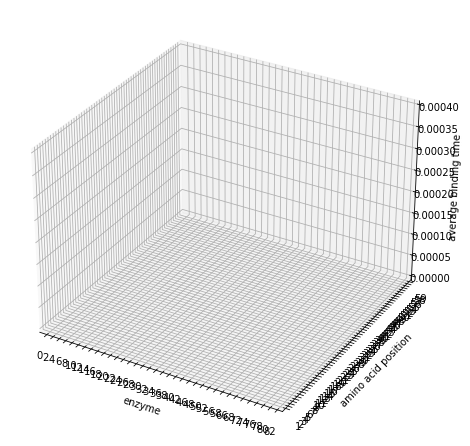

In [64]:
from mpl_toolkits.mplot3d import Axes3D

# thickness of the bars
dx, dy = .8, .2

# prepare 3d axes
fig = plt.figure(figsize=(10,6))
ax = Axes3D(fig)

# set up positions for the bars 
xpos=np.arange(df.shape[0])
ypos=np.arange(df.shape[1])

# set the ticks in the middle of the bars
ax.set_xticks(xpos + dx/2)
ax.set_yticks(ypos + dy/2)

# create meshgrid 
# print xpos before and after this block if not clear
xpos, ypos = np.meshgrid(xpos, ypos)
xpos = xpos.flatten()
ypos = ypos.flatten()

# the bars starts from 0 altitude
zpos=np.zeros(df.shape).flatten()

# the bars' heights
dz = df.values.ravel()

# plot 
# ax.bar3d(xpos,ypos,zpos,dx,dy,dz)
# plt.heatmap(xpos,ypos,zpos,dx,dy,dz)


# put the column / index labels
ax.w_yaxis.set_ticklabels(df.columns)
ax.w_xaxis.set_ticklabels(df.index)

# name the axes
ax.set_xlabel('enzyme')
ax.set_ylabel('amino acid position')
ax.set_zlabel('average binding time')

ax.set_zlim(0,0.0004)


# plt.show()

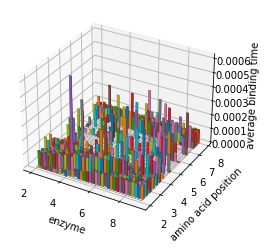

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors
import matplotlib.cm as cmx

# from apodemus's Stackoverflow answer,
# https://stackoverflow.com/questions/18602660/matplotlib-bar3d-clipping-problems
def sph2cart(r, theta, phi):
    '''spherical to Cartesian transformation.'''
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    return x, y, z

def sphview(ax):
    '''returns the camera position for 3D axes in spherical coordinates'''
    r = np.square(np.max([ax.get_xlim(), ax.get_ylim()], 1)).sum()
    theta, phi = np.radians((90-ax.elev, ax.azim))
    return r, theta, phi
#
# end of apodemus's code

def getDistances(view):
    distances  = []
    a = np.array((xpos, ypos, dz))
    for i in range(len(xpos)):
        distance = (a[0, i] - view[0])**2 + (a[1, i] - view[1])**2 + (a[2, i] - view[2])**2
        distances.append(np.sqrt(distance))
    return distances

# ================================================================



lx = df.shape[0]
ly = df.shape[1]
n = lx*ly

# generate colors
# cm = plt.get_cmap('jet')
# vv = range(len(df))
# cNorm = colors.Normalize(vmin=0, vmax=vv[-1])
# scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
# colorVals = [scalarMap.to_rgba(i) for i in range(ly)]

# set the ticks in the middle of the bars
ax.set_xticks(xpos + dx/2)
ax.set_yticks(ypos + dy/2)

# generate plot data
xpos = np.arange(0,lx,1)  
ypos = np.arange(0,ly,1)
xpos, ypos = np.meshgrid(xpos, ypos)
xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros(n)
# dx = 0.5*np.ones_like(zpos)
# dy = dx.copy()
dz = df.values.ravel()

# cc = np.tile(range(lx), (ly,1))
# cc = cc.T.flatten()

# generate plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
opacity = 1

# Get the camera's location in Cartesian coordinates.
x1, y1, z1 = sph2cart(*sphview(ax))
camera = np.array((x1,y1,0))

# Calculate the distance of each bar from the camera.
# z_order = getDistances(camera)
z_order = np.multiply(np.array([xpos,ypos, np.zeros_like(xpos)]).T, camera).T.sum(0)
# z_order = np.multiply([X, Y, np.zeros_like(Zg)], xyz).sum(0)
max = np.max(z_order)

for i in range(n):
    pl = ax.bar3d(xpos[i], ypos[i], zpos[i], dx, dy, dz[i],
             zsort='max')
    # The z-order must be set explicitly.
    #
    # z-order values are somewhat backwards in magnitude, in that the largest
    # value is closest to the camera - unlike, in say, a coordinate system.
    # Therefore, subtracting the maximum distance from the calculated distance
    # inverts the z-order to the proper form.
    # pl._sort_zpos = max - z_order[i]
    pl._sort_zpos = z_order[i]

# put the column / index labels
ax.w_yaxis.set_ticklabels(df.columns)
ax.w_xaxis.set_ticklabels(df.index)

# name the axes
ax.set_xlabel('enzyme')
ax.set_ylabel('amino acid position')
ax.set_zlabel('average binding time')

ax.set_zlim(0,0.0004)
ax.view_init(elev=30, azim=-60) # Changes the elevation and azimuth

plt.autoscale(enable=True, axis='both', tight=True)
plt.grid()
plt.show()

7.941234862021045


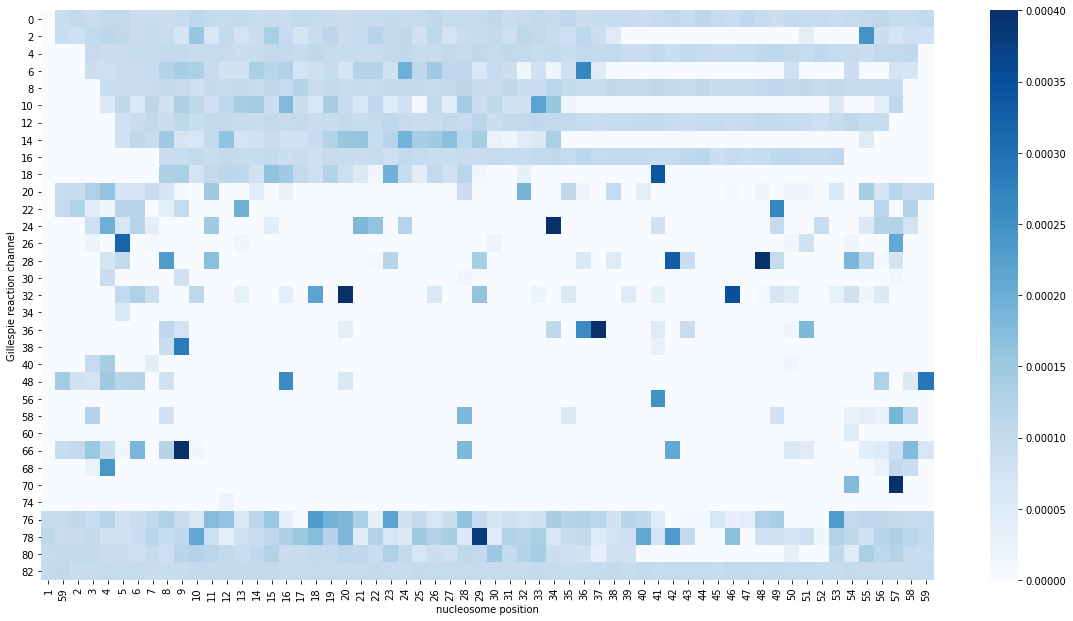

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# create some random data; replace that by your actual dataset
# data = pd.DataFrame(np.random.rand(11, 5), columns=['A', 'B', 'C', 'D', 'E'], index = range(2000, 2011, 1))

# get the tick label font size
fontsize_pt = 16
dpi = 72.27

# comput the matrix height in points and inches
matrix_height_pt = fontsize_pt * df.shape[0]
# print(plt.rcParams)
matrix_height_in = matrix_height_pt / dpi

# compute the required figure height 
top_margin = 0.04  # in percentage of the figure height
bottom_margin = 0.04 # in percentage of the figure height
figure_height = matrix_height_in / (1 - top_margin - bottom_margin)

print(figure_height)
# build the figure instance with the desired height
fig, ax = plt.subplots(
        figsize=(20,8.6), 
        gridspec_kw=dict(top=0.96, bottom=0.04))


# plot heatmap
ax = sns.heatmap(df, cmap='Blues', vmin=0, vmax=0.0004, xticklabels=1, yticklabels=1)

ax.set(xlabel="nucleosome position", ylabel="Gillespie reaction channel")

# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)

for item in ax.get_xticklabels():
    item.set_rotation(90)

# save figure
# plt.savefig('seabornPandas.png', dpi=100)
plt.show()

In [8]:
df.shape[0]

36

In [6]:
identifier = []
proteinSeq = []
with open("fasta.txt") as mockfile:
    for line in mockfile:
        if line.startswith("\">\""):
            identifier.append(line)
        else:
            proteinSeq.append(line)
print(identifier)
print(proteinSeq)

SyntaxError: EOL while scanning string literal (<ipython-input-6-cdf981bdd0c0>, line 5)